In [57]:
import acquire
import sklearn.model_selection
from scipy import stats
import pandas as pd
import numpy as np

df = acquire.get_titanic_data()

train, test = sklearn.model_selection.train_test_split(df, random_state=123, train_size=.8)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
329,329,1,1,female,16.0,0,1,57.9792,C,First,B,Cherbourg,0
749,749,0,3,male,31.0,0,0,7.7500,Q,Third,None,Queenstown,1
203,203,0,3,male,45.5,0,0,7.2250,C,Third,None,Cherbourg,1
421,421,0,3,male,21.0,0,0,7.7333,Q,Third,None,Queenstown,1
97,97,1,1,male,23.0,0,1,63.3583,C,First,D,Cherbourg,0


In [58]:
train = train.drop(columns=['passenger_id', 'embarked', 'class', 'deck'])

In [59]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
329,1,1,female,16.0,0,1,57.9792,Cherbourg,0
749,0,3,male,31.0,0,0,7.7500,Queenstown,1
203,0,3,male,45.5,0,0,7.2250,Cherbourg,1
421,0,3,male,21.0,0,0,7.7333,Queenstown,1
97,1,1,male,23.0,0,1,63.3583,Cherbourg,0


## Categorical vs Continuous

- boxplot + swarmplot, violinplot --  for these functions y should be continuous, x should be categorical
- age
- fare

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
plt.rc('figure', figsize=(16, 9))
plt.rc('font', size=14)

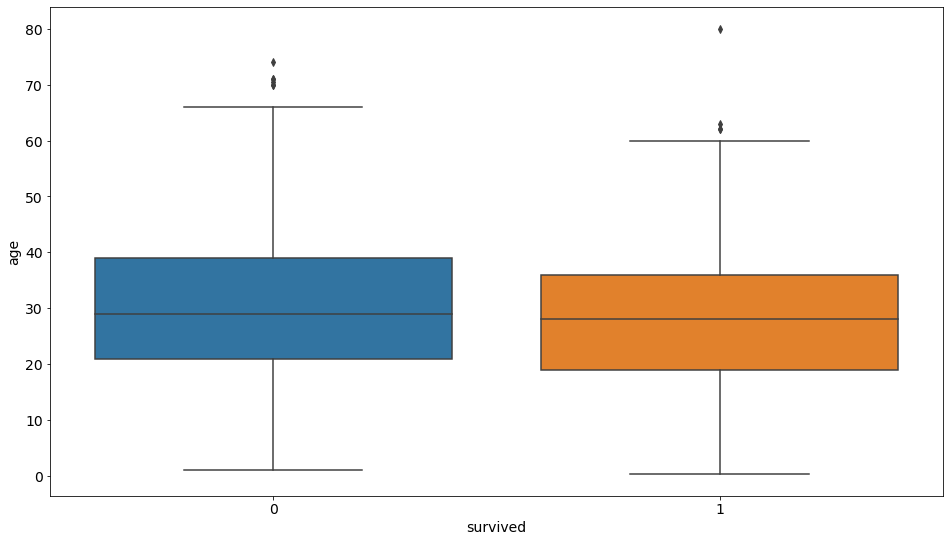

In [62]:
sns.boxplot(y='age', x='survived', data=train)

Takeaway: no big difference in age

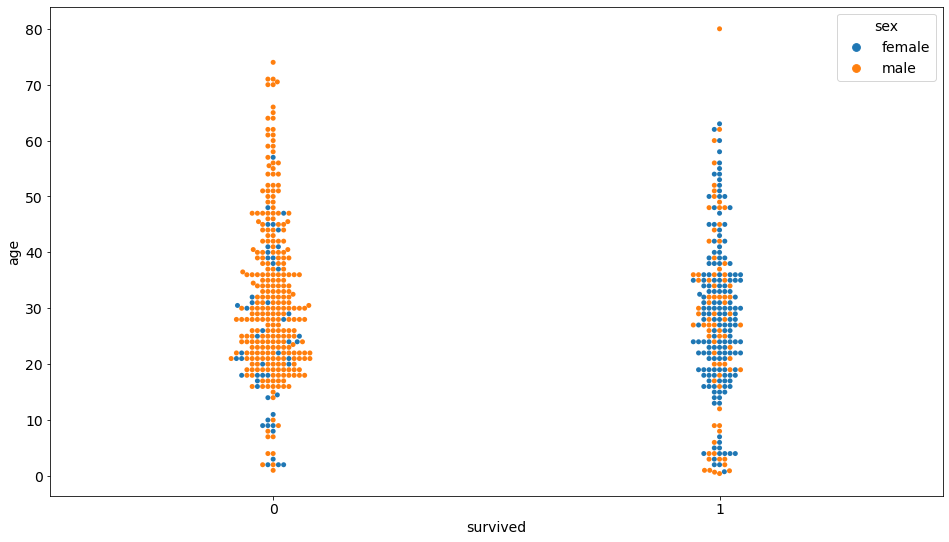

In [63]:
sns.swarmplot(y='age', x='survived', data=train, hue='sex')

Takeaway:

- it wasn't quite captured in the bloxplot, but it looks like there were more clustering on the lower end of the `age` variable among those that survived

- when adding gender it looks like more women survived

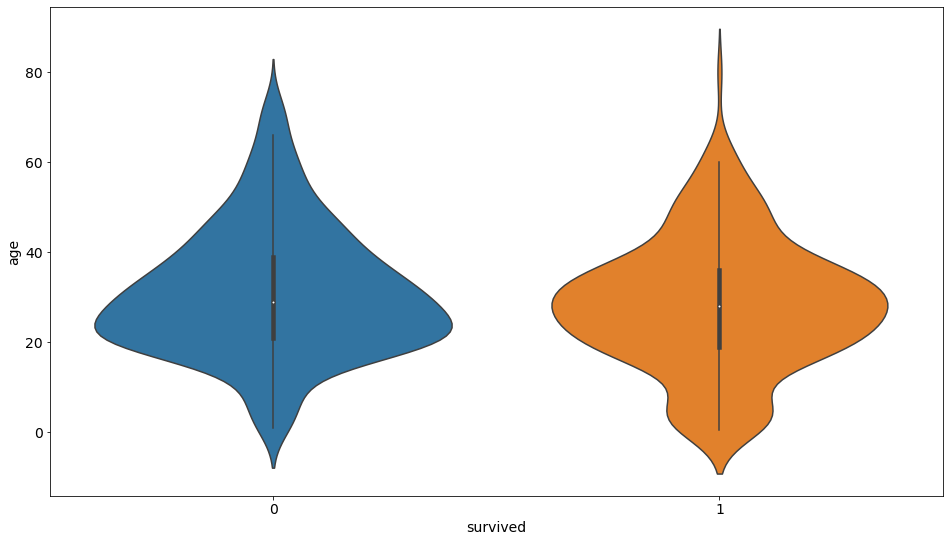

In [64]:
sns.violinplot(y='age', x='survived', data=train)

In [65]:
train.groupby('survived').fare.mean()

survived
0    22.501635
1    47.914547
Name: fare, dtype: float64

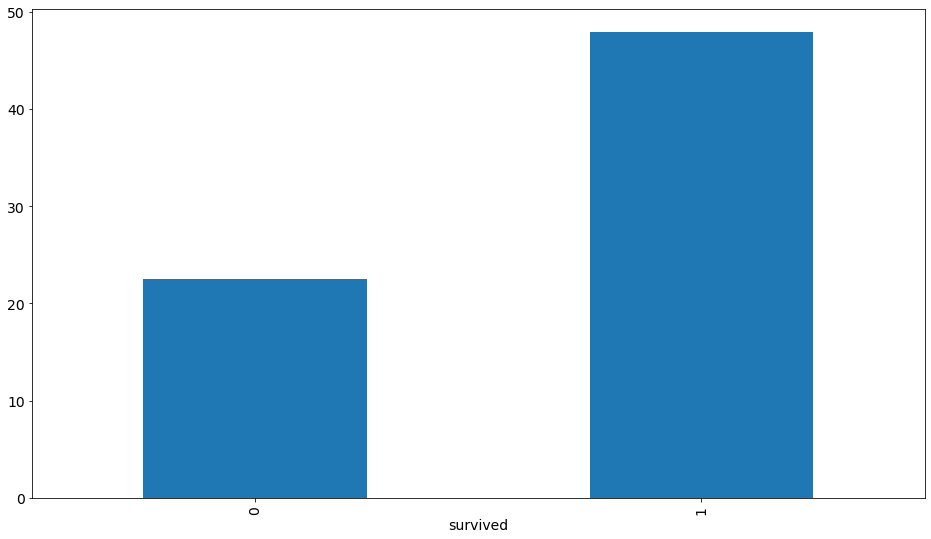

In [66]:
# with a pandas series .plot.bar will turn the index into xlabels, and the values into bar heights

train.groupby('survived').fare.mean().plot.bar()

In [67]:
stats.ttest_ind(
    train[train.survived == 1].fare,
    train[train.survived == 0].fare
)

Ttest_indResult(statistic=6.512874301818937, pvalue=1.3955507135677185e-10)

Takeaway: people that survived tended to have paid more for their tickets

Question: how does class play into survival rate?

Question: how does gender interact with fare?

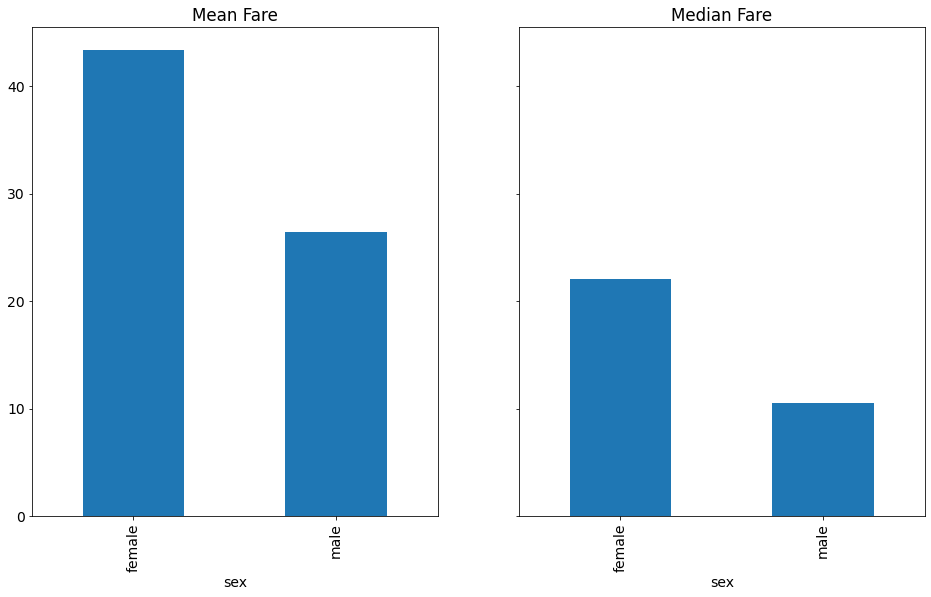

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

train.groupby('sex').fare.mean().plot.bar(ax=ax1, title='Mean Fare')
train.groupby('sex').fare.median().plot.bar(ax=ax2, title='Median Fare')

Question: what is the distribution of gender and class?

One more viz for categorical vs continuous: distribution of fare vs survived

[Text(0.5, 0, 'Fare'), Text(0.5, 1.0, 'Perished')]

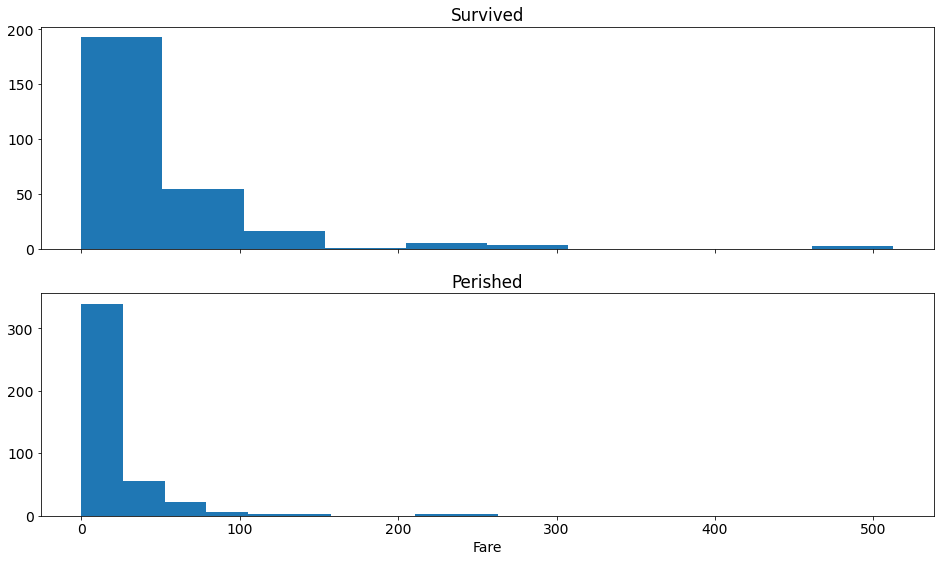

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.hist(train[train.survived == 1].fare)
ax1.set(title='Survived')
ax2.hist(train[train.survived == 0].fare)
ax2.set(title='Perished', xlabel='Fare')

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Perished')]

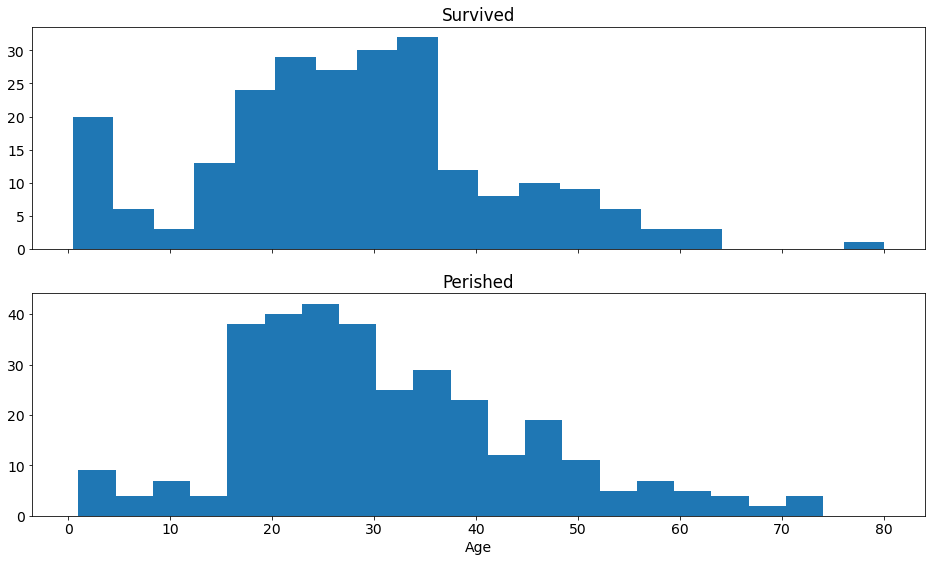

In [70]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.hist(train[train.survived == 1].age, bins=20)
ax1.set(title='Survived')
ax2.hist(train[train.survived == 0].age, bins=20)
ax2.set(title='Perished', xlabel='Age')

## Survived against Categorical features

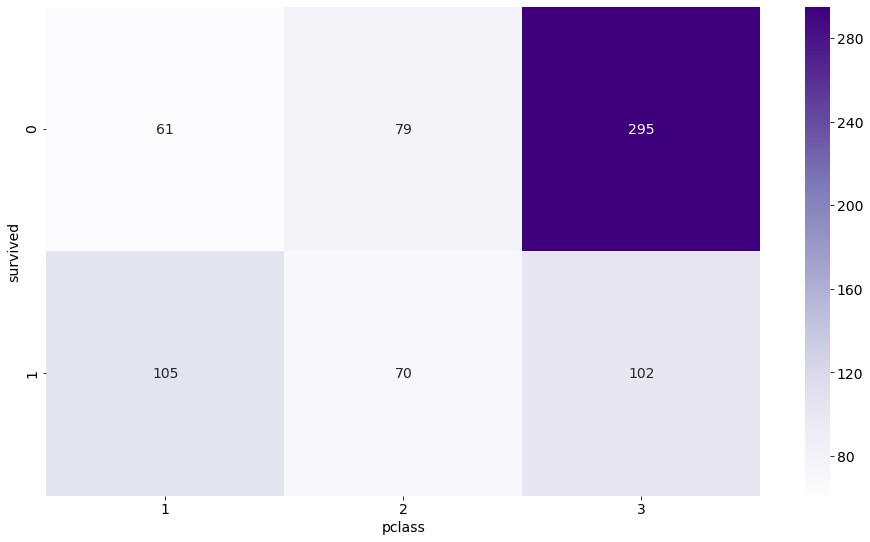

In [72]:
ctab = pd.crosstab(train.survived, train.pclass)
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='d')

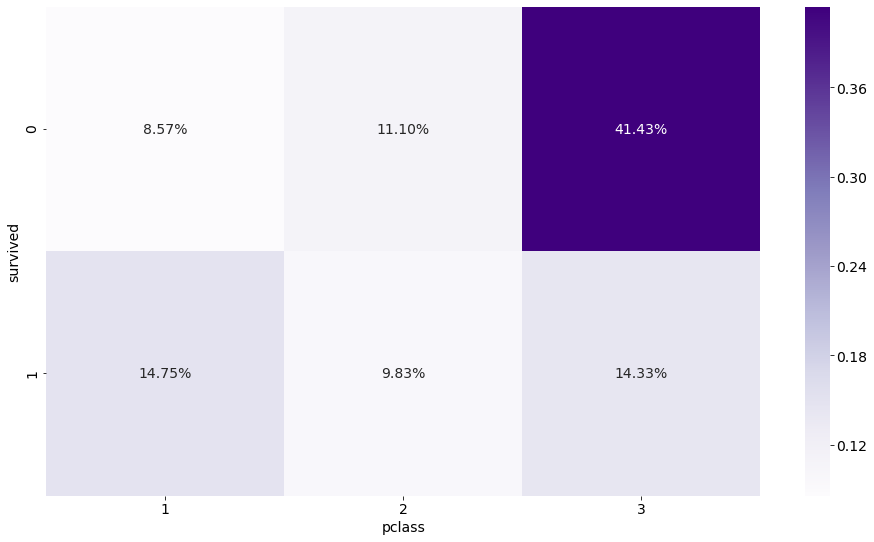

In [76]:
# normalize=True changes from row counts to proportions
# the sum of all the numbers is 1

ctab = pd.crosstab(train.survived, train.pclass, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Purples', fmt='.2%')

Takeaway:
    
- There are many more folks in 3rd class than any other
- Looks like the survival rate is higher in first class over third class

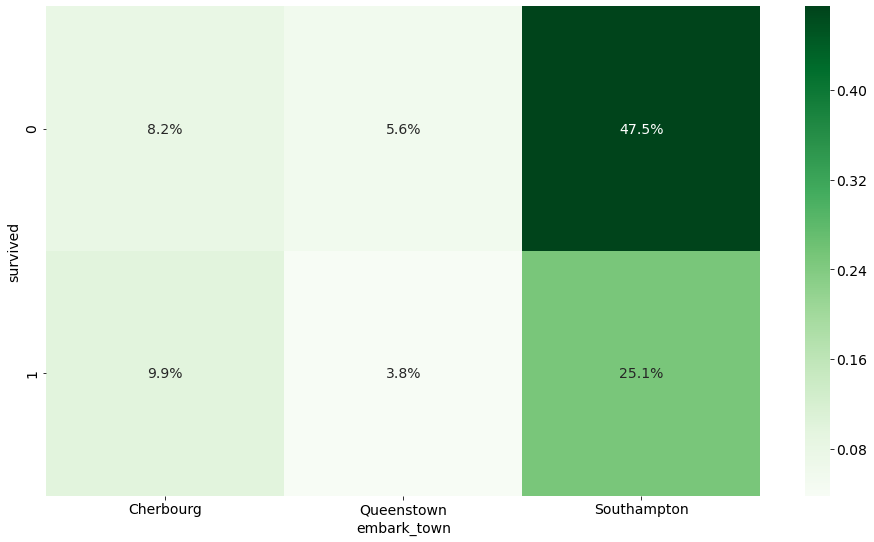

In [82]:
ctab = pd.crosstab(train.survived, train.embark_town, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.1%')

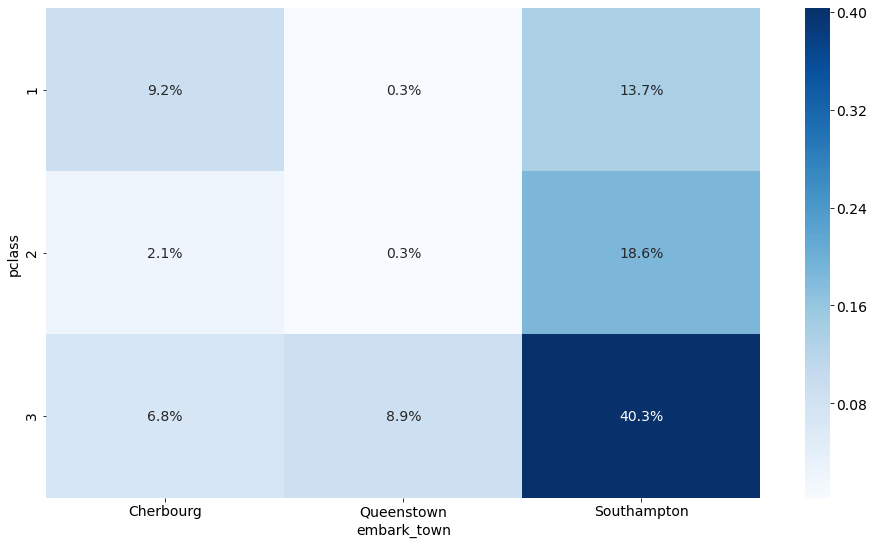

In [83]:
ctab = pd.crosstab(train.pclass, train.embark_town, normalize=True)
sns.heatmap(ctab, annot=True, cmap='Blues', fmt='.1%')

## Treat our target as a number

Survived is 1 or 0, this has some nice properties

- the sum of the survived column is the number of people that survived
- the mean is the survival rate
- this applites to subgroups

In [85]:
train.shape

(712, 9)

In [86]:
train.survived.sum()

277

In [87]:
train.survived.mean()

0.3890449438202247

In [88]:
train.groupby('sex').survived.sum()

sex
female    187
male       90
Name: survived, dtype: int64

In [89]:
train.groupby('sex').survived.mean()

sex
female    0.745020
male      0.195228
Name: survived, dtype: float64

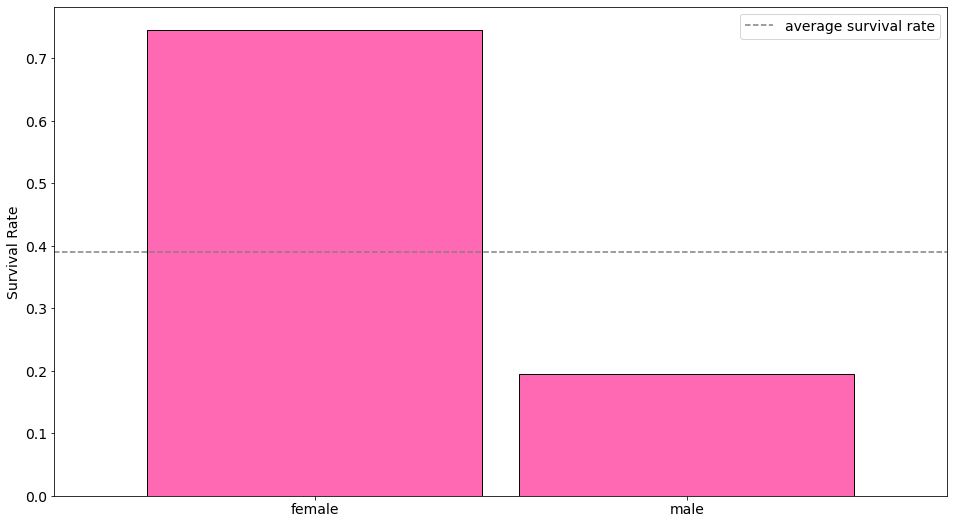

In [99]:
train.groupby('sex').survived.mean().plot.bar(ec='black', fc='hotpink', width=.9, label='')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Survival Rate')
# .hlines draws horizontal lines
# .hlines(height, starts, ends)
# .hlines(y, xmin, xmax)
plt.hlines(train.survived.mean(), *plt.xlim(), ls='--', color='grey', label='average survival rate')
plt.legend()

plt.show()

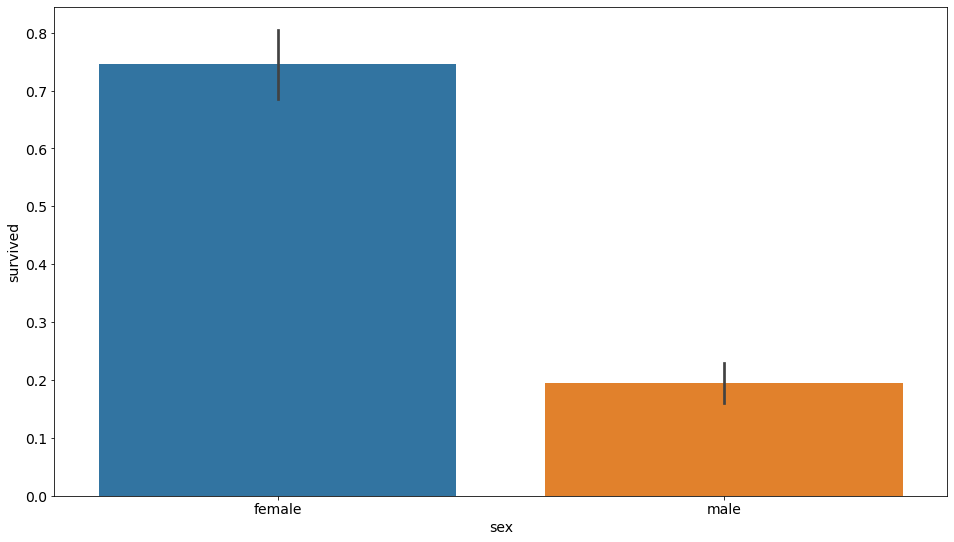

In [101]:
sns.barplot(x='sex', y='survived', data=train)

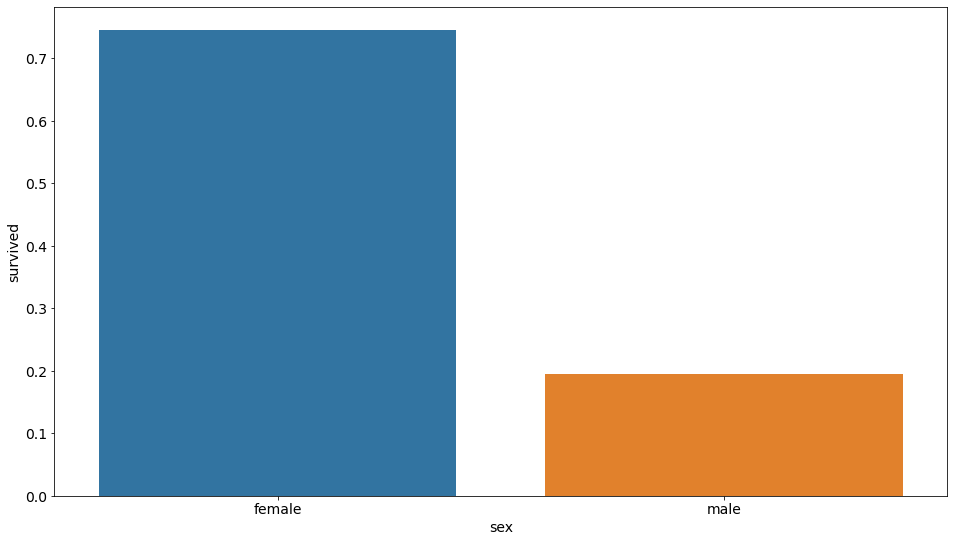

In [102]:
sns.barplot(x='sex', y='survived', data=train, ci=None)

In [103]:
train.groupby(['pclass', 'sex']).survived.mean()

pclass  sex   
1       female    0.985714
        male      0.375000
2       female    0.919355
        male      0.149425
3       female    0.512605
        male      0.147482
Name: survived, dtype: float64

In [105]:
pd.crosstab(train.pclass, train.sex, values=train.survived, aggfunc='mean')

sex,female,male
pclass,,
1,0.985714,0.375000
2,0.919355,0.149425
3,0.512605,0.147482


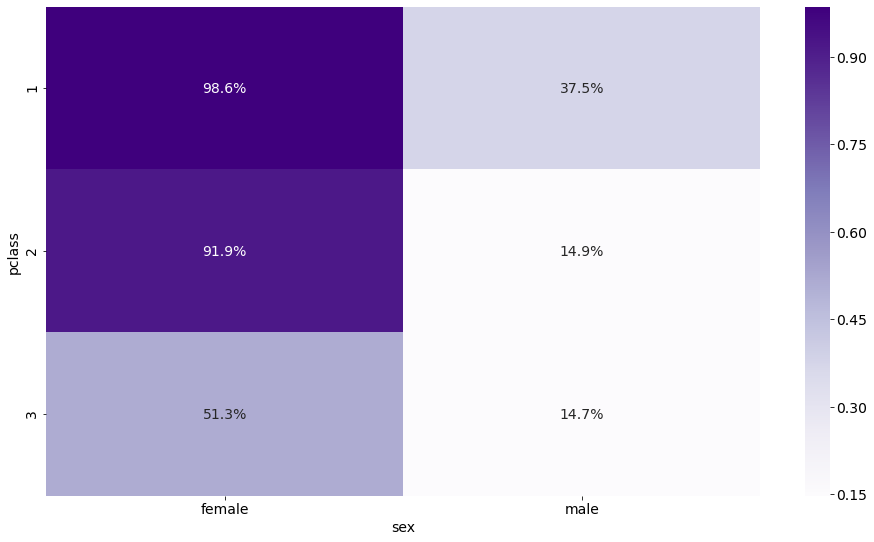

In [106]:
ctab = pd.crosstab(train.pclass, train.sex, values=train.survived, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Purples',fmt='.1%')

In [107]:
train.pivot_table('survived', 'pclass', 'sex')

sex,female,male
pclass,,
1,0.985714,0.375000
2,0.919355,0.149425
3,0.512605,0.147482


## Proportions within a group

- what percentage of people from each embark town are in each class
- **not** what percentage of the overall population is each of those combinations of categories

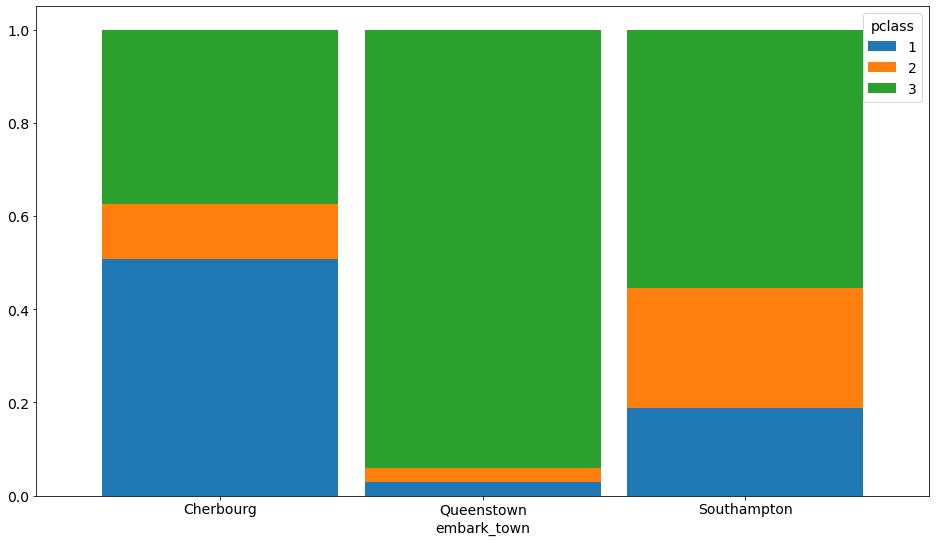

In [112]:
# for every unique embark_town, what is the percentage of values in each class?
x1 = 'embark_town'
x2 = 'pclass'

(train.groupby(x1)[x2].apply(lambda s: s.value_counts(normalize=True)).unstack().plot.bar(stacked=True, width=.9))
plt.legend(title=x2)
plt.xticks(rotation=0)
plt.xlabel=''

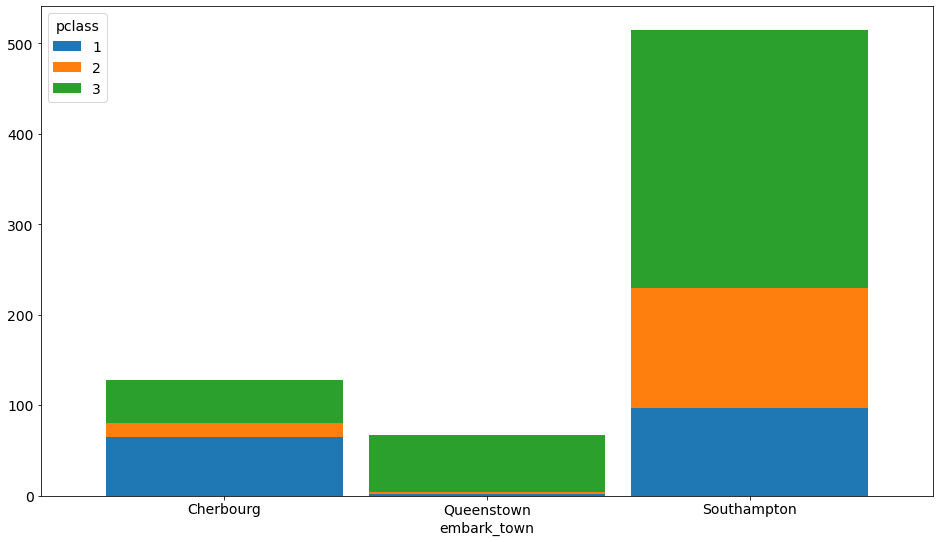

In [113]:
# for every unique embark_town, what is the percentage of values in each class?
x1 = 'embark_town'
x2 = 'pclass'

(train.groupby(x1)[x2].apply(lambda s: s.value_counts(normalize=False)).unstack().plot.bar(stacked=True, width=.9))
plt.legend(title=x2)
plt.xticks(rotation=0)
plt.xlabel=''

Question: What was the average fare for the combination of departure town and class?

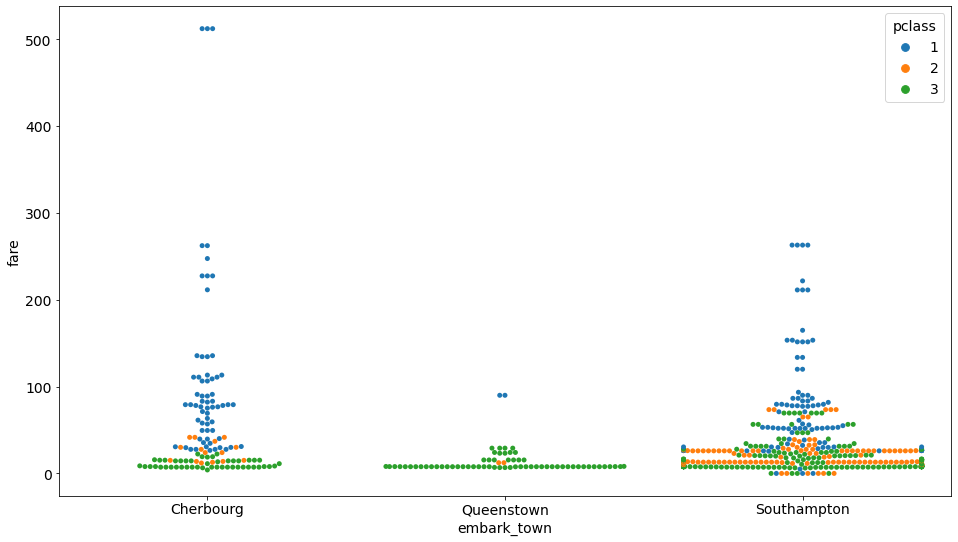

In [114]:
sns.swarmplot(y='fare', x='embark_town', data=train, hue='pclass')

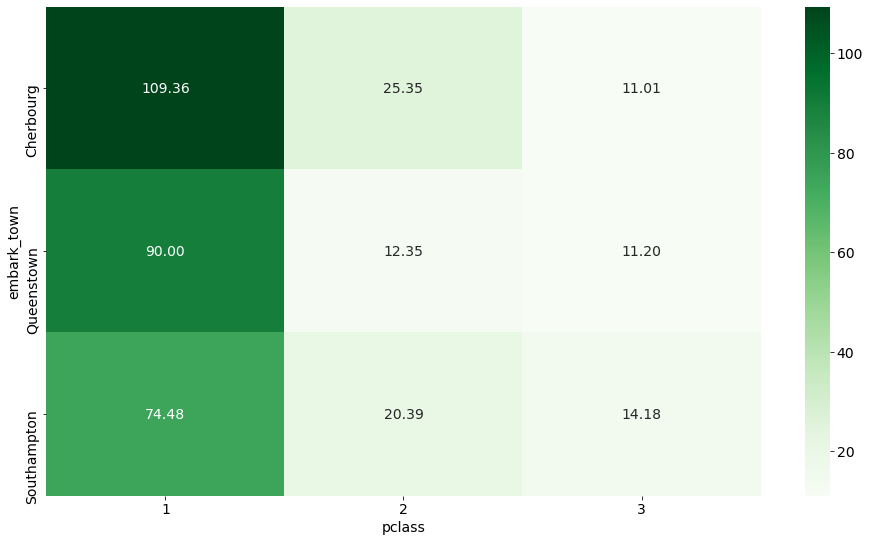

In [121]:
ctab = pd.crosstab(train.embark_town, train.pclass, values=train.fare, aggfunc='mean')
sns.heatmap(ctab, annot=True, cmap='Greens', fmt='.2f')

In [122]:
subset = train[train.fare < 300][['survived', 'age', 'fare']]
subset.head()

,survived,age,fare
329,1,16.0,57.9792
749,0,31.0,7.7500
203,0,45.5,7.2250
421,0,21.0,7.7333
97,1,23.0,63.3583


In [123]:
melt = pd.melt(subset, 'survived', var_name='measurement')
melt

,survived,measurement,value
0,1,age,16.000
1,0,age,31.000
2,0,age,45.500
3,0,age,21.000
4,1,age,23.000
...,...,...,...
1413,1,fare,23.000
1414,1,fare,12.350
1415,0,fare,7.925
1416,0,fare,7.250


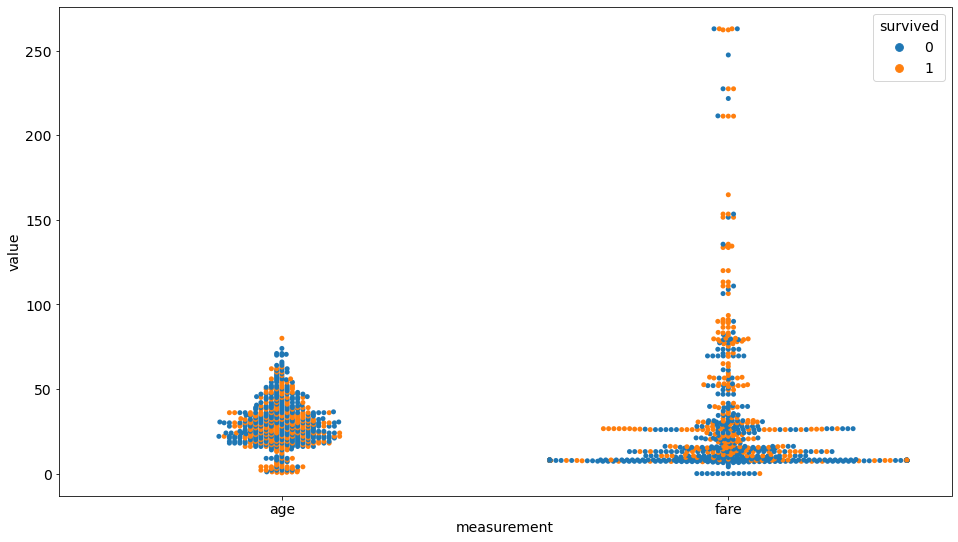

In [125]:
sns.swarmplot(data=melt, y='value', x='measurement', hue='survived')

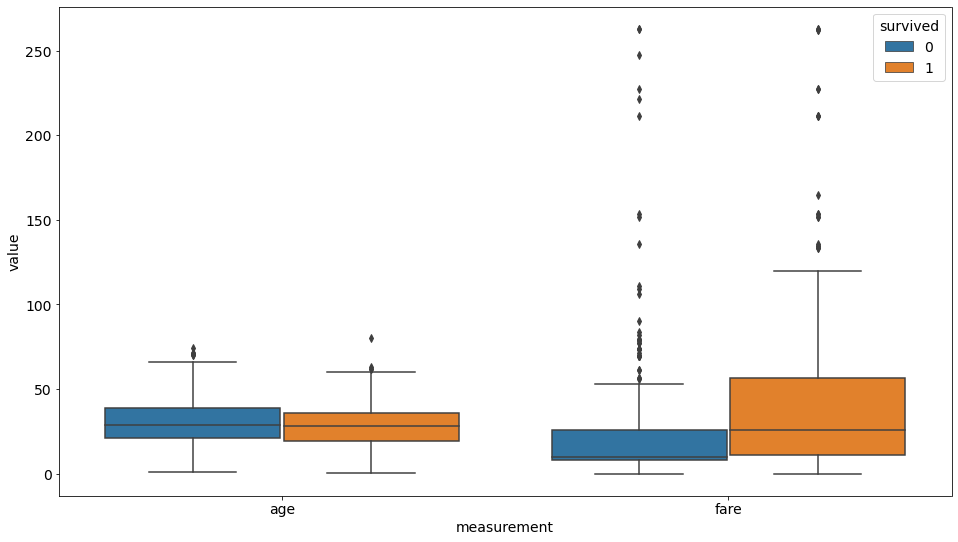

In [124]:
sns.boxplot(data=melt, y='value', x='measurement', hue='survived')

## Binning for Exploration

turning a continuous variable into a categorical one

In [132]:
pd.cut(train.age, 3).value_counts().sort_index

<bound method Series.sort_index of (26.947, 53.473]    276
(0.34, 26.947]      249
(53.473, 80.0]       39
Name: age, dtype: int64>

In [130]:
train['age_bin'] = pd.cut(train.age, bins=[0, 18, 80], labels=['child', 'adult'])

In [131]:
train.groupby('age_bin').survived.mean()

age_bin
child    0.514286
adult    0.396514
Name: survived, dtype: float64